In [16]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../") not in sys.path:
    sys.path.append(os.path.abspath("../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis


# Load list of branching instructions
In the form of instruction addresses 


In [18]:
import json 

test_name = "call"

input_binary = os.path.abspath(f"./test_programs/{test_name}/{test_name}")
output_assembly = os.path.abspath(f"./test_programs/{test_name}/{test_name}_rw.s")
output_binary = os.path.abspath(f"./test_programs/{test_name}/{test_name}_rw")
test_values = os.path.abspath(f"./test_programs/{test_name}/test_inputs.txt")


branching_instructions = [1160, 1178]

# instrument each function seperately 
First instrument the code, then dump the rewritten program, then compile into new binary using gcc 

In [19]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

tool = NemesisInstrumentProgram(input_binary, output_assembly)



[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


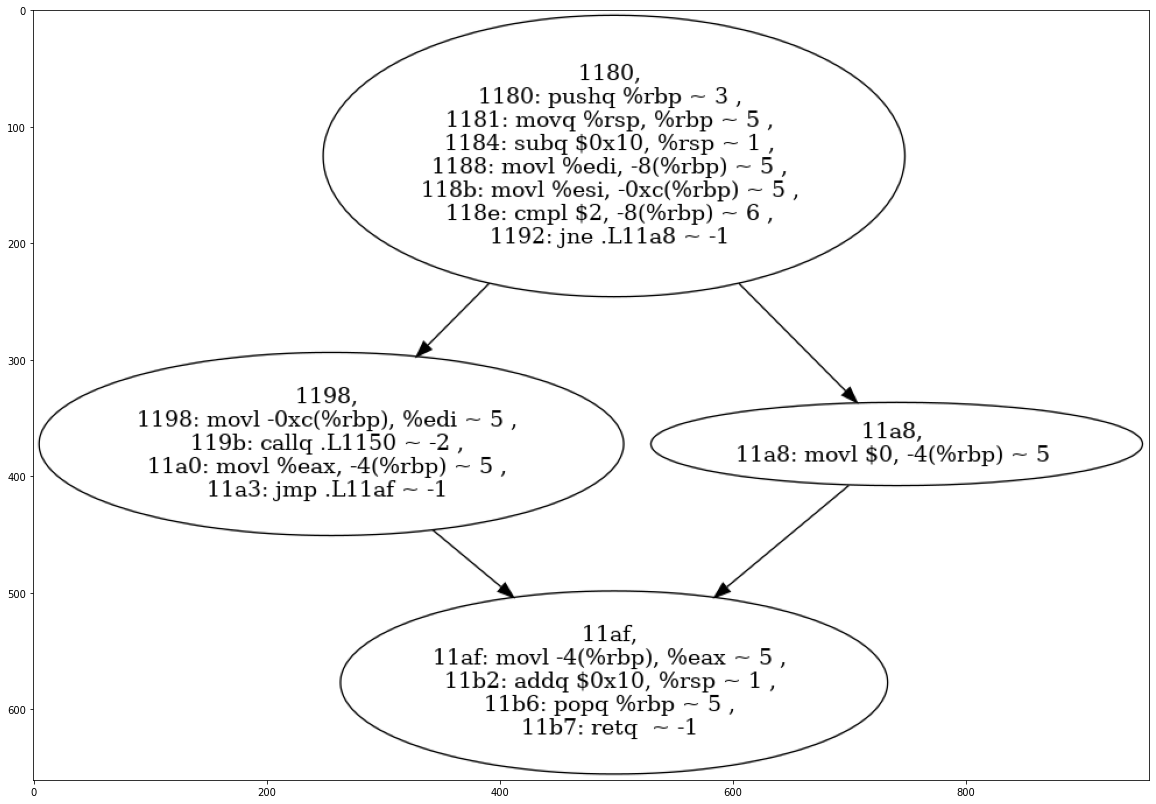

In [20]:
figs, axs = plt.subplots(1, figsize=(20,20))
axs.imshow(tool.functions['call'].render_cfg())

In [21]:

tool.instrument_program([1192])

tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])

foo
main
call
1180
1198
11a8
11af


CompletedProcess(args=['gcc', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/call/call_rw.s', '-o', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/call/call_rw'], returncode=0)

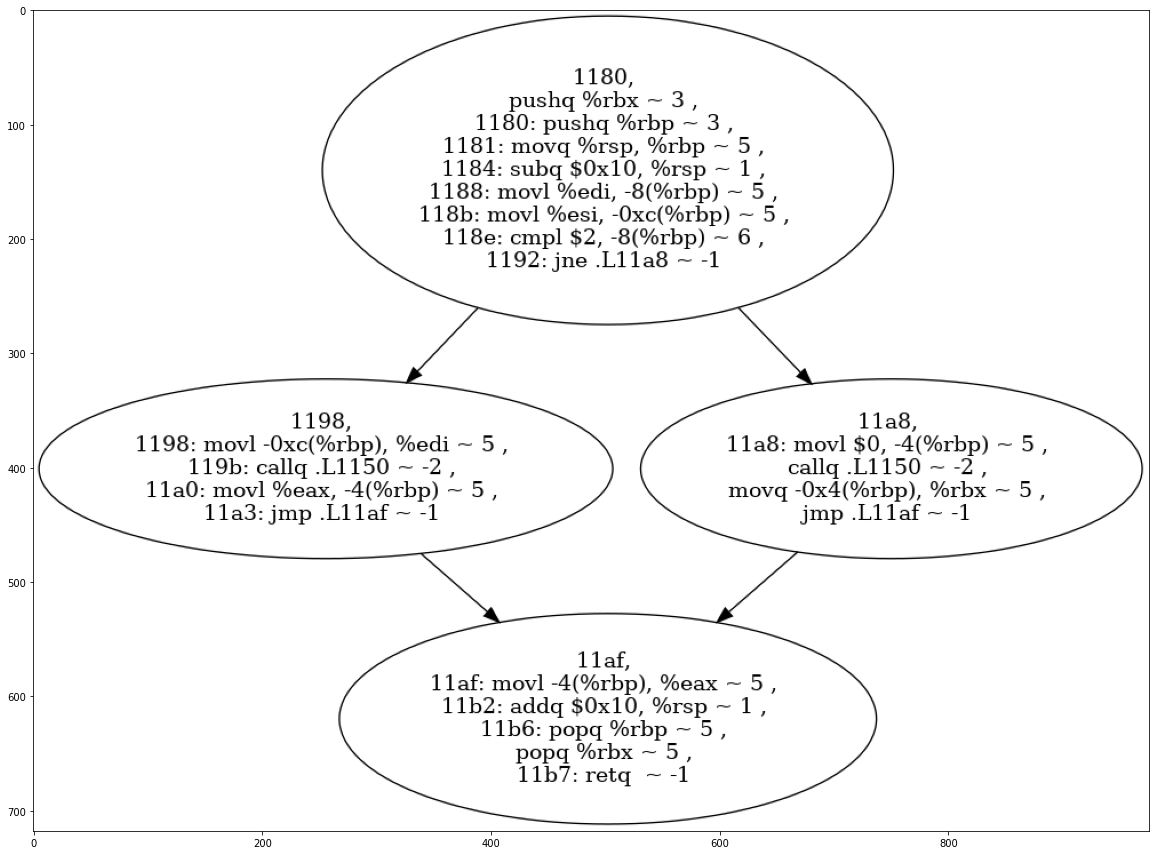

In [22]:
figs, axs = plt.subplots(1, figsize=(20,20))
axs.imshow(tool.functions['call'].render_cfg())


# check if program is balanced 

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3db8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
foo
main
call
no issues found


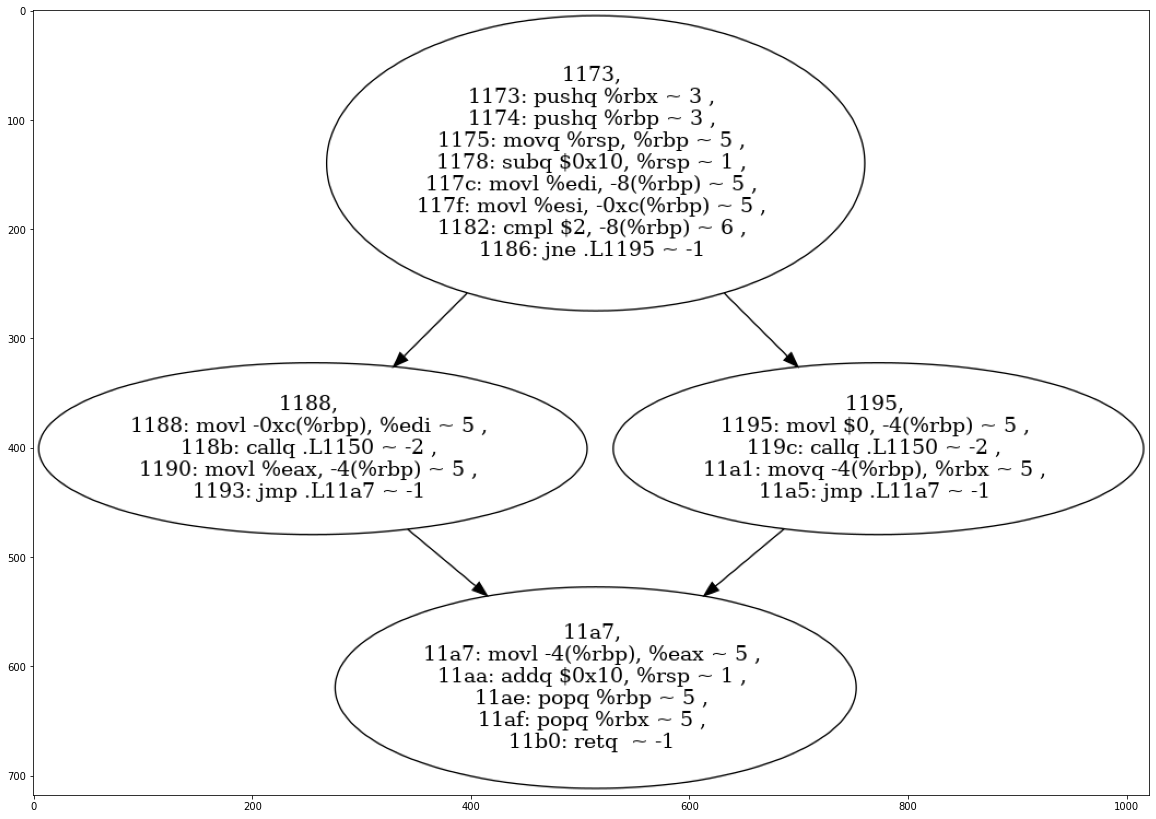

In [24]:
from rwtools.nemesis.evaluationtool import NemesisEvaluateProgram 
evaluation = NemesisEvaluateProgram(output_binary, "")

figs, axs = plt.subplots(1, figsize=(20,20))

evaluation.evaluate_program([1186])
axs.imshow(evaluation.functions['call'].render_cfg())


# check if program output / execution remains unchanged 


In [6]:

program_input = "2 10"
cmd = f"{output_binary} {program_input}"

subprocess.run([output_binary, "2", "10"])

test_cases = []

with open(test_values, "r") as f: 
    for line in f:
        test_cases.append(line.strip().split(" "))

for test_case in test_cases: 
    expected = subprocess.run([input_binary, *test_case]).returncode
    result = subprocess.run([output_binary, *test_case]).returncode
    if expected != result:
        print("incorrect result on test with inputs", *test_case)


# Evaluate effect on runtime 

In [7]:
import json 

test_name = "call"

input_binary = os.path.abspath(f"./test_programs/{test_name}/timed_{test_name}")
output_assembly = os.path.abspath(f"./test_programs/{test_name}/timed_{test_name}_rw.s")
output_binary = os.path.abspath(f"./test_programs/{test_name}/timed_{test_name}_rw")
test_values = os.path.abspath(f"./test_programs/{test_name}/test_inputs.txt")

with open(f"./test_programs/{test_name}/secrets.json", "r") as f: 
    d = json.load(f)

branching_instructions = d['branches']

branching_instructions

[1192]

In [8]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

tool = NemesisInstrumentProgram(input_binary, output_assembly)

tool.instrument_program(branching_instructions)

tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


CompletedProcess(args=['gcc', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/call/timed_call_rw.s', '-o', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/call/timed_call_rw'], returncode=0)

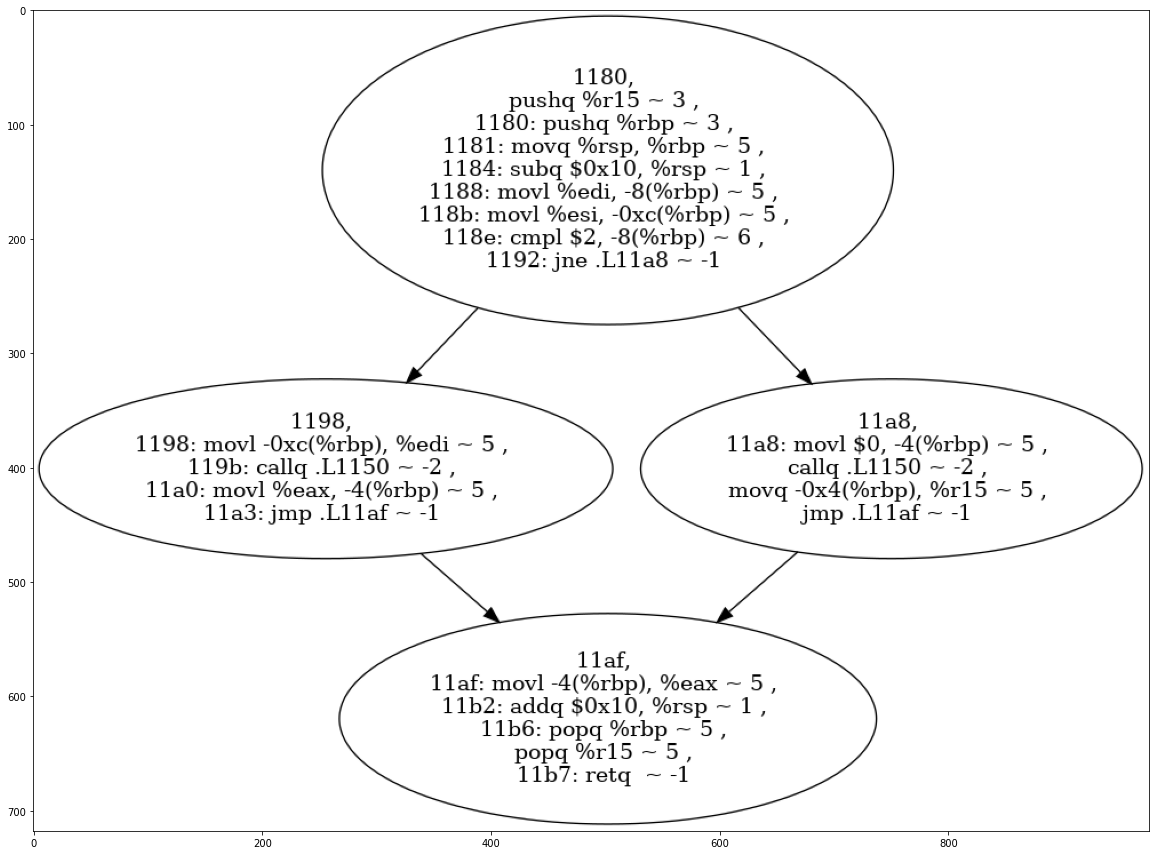

In [12]:
figs, axs = plt.subplots(1, figsize=(20, 20))
axs.imshow(tool.functions['call'].render_cfg())

In [20]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

evaluate = NemesisEvaluateProgram(output_binary, output_assembly)

evaluate.evaluate_program(['1197'])

tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3db8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


CompletedProcess(args=['gcc', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/call/timed_call_rw.s', '-o', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/call/timed_call_rw'], returncode=0)

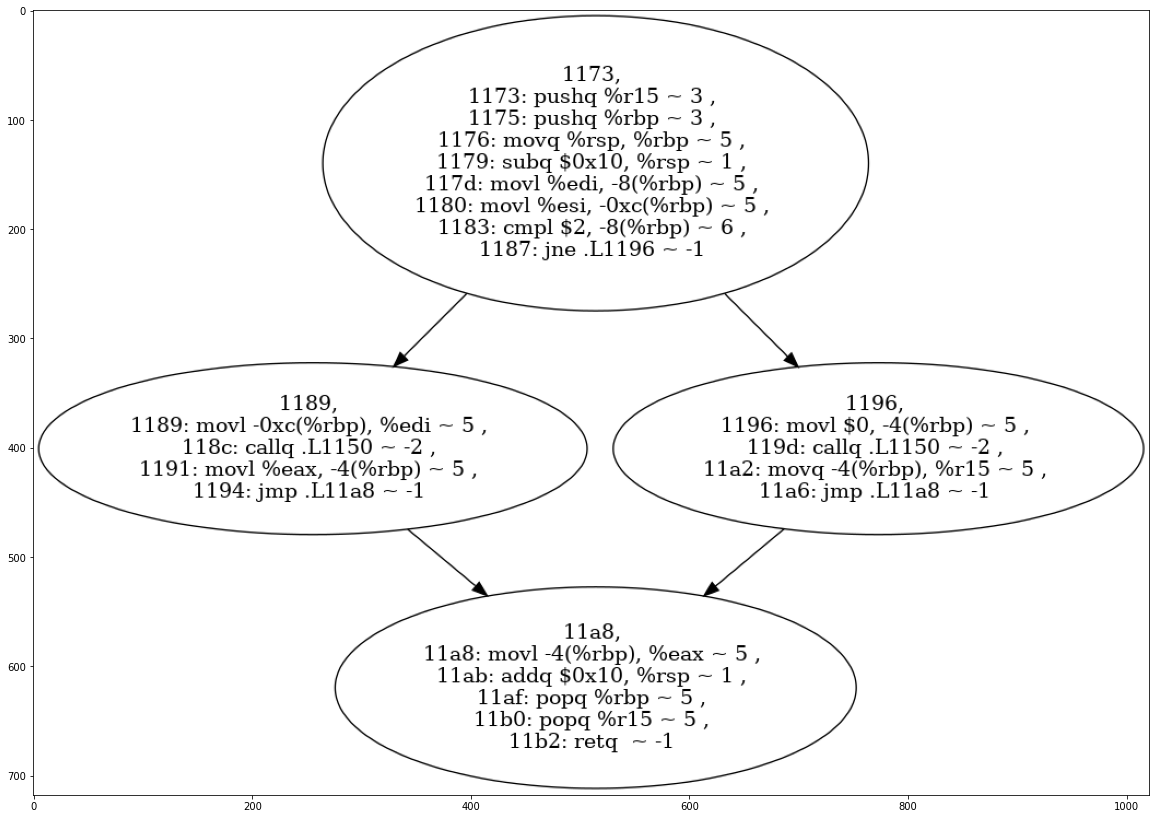

In [21]:
figs, axs = plt.subplots(1, figsize=(20, 20))
axs.imshow(evaluate.functions['call'].render_cfg())

Run original program 1000 times, check avg number of elapsed cycles, do same for balanced program 

In [82]:
a = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([input_binary, "2", "10"])
    a.append(result.returncode)

b = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([input_binary, "1", "10"])
    b.append(result.returncode)




(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.,   1.,   5.,   5.,   3.,   7.,   6.,   9.,  17.,  18.,  34.,
         62., 130., 135., 106., 102., 109., 113.,  34.,  32.,  34.,  17.,
         10.,   1.,   5.,   1.,   1.,   0.,   0.]),
 array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
         50.  ,  56.25,  62.5 ,  68.75,  75.  ,  81.25,  87.5 ,  93.75,
        100.  , 106.25, 112.5 , 118.75, 125.  , 131.25, 137.5 , 143.75,
        150.  , 156.25, 162.5 , 168.75, 175.  , 181.25, 187.5 , 193.75,
        200.  , 206.25, 212.5 , 218.75, 225.  , 231.25, 237.5 , 243.75,
        250.  ]),
 <BarContainer object of 40 artists>)

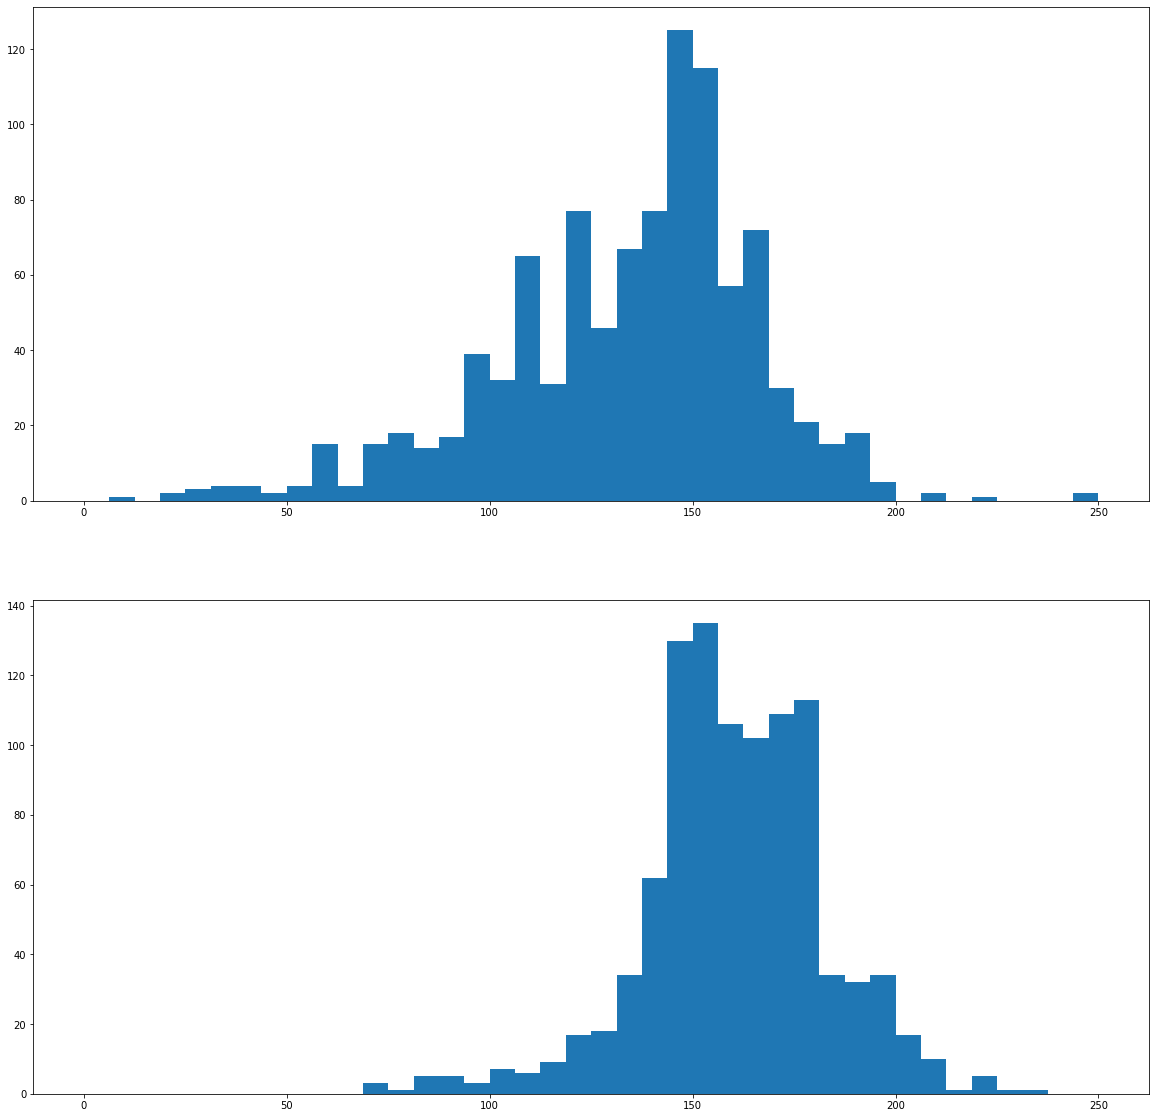

In [83]:
figs, axs = plt.subplots(2, figsize=(20, 20))
axs[0].hist(a, bins=40, range=[0, 250])
axs[1].hist(b, bins=40, range=[0, 250])



In [84]:
c = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([output_binary, "2", "10"])
    c.append(result.returncode)

d = []
# timed_binary = 
for i in range(1000): 
    result = subprocess.run([output_binary, "1", "10"])
    d.append(result.returncode)




(array([  0.,   0.,   0.,   1.,   8.,   9.,  11.,   6.,   8.,  14.,   5.,
         21.,  25.,  23.,  31.,  49.,  82.,  59.,  86., 163.,  69., 121.,
         36.,  22.,  99.,  11.,   2.,  14.,  22.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.]),
 array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
         50.  ,  56.25,  62.5 ,  68.75,  75.  ,  81.25,  87.5 ,  93.75,
        100.  , 106.25, 112.5 , 118.75, 125.  , 131.25, 137.5 , 143.75,
        150.  , 156.25, 162.5 , 168.75, 175.  , 181.25, 187.5 , 193.75,
        200.  , 206.25, 212.5 , 218.75, 225.  , 231.25, 237.5 , 243.75,
        250.  ]),
 <BarContainer object of 40 artists>)

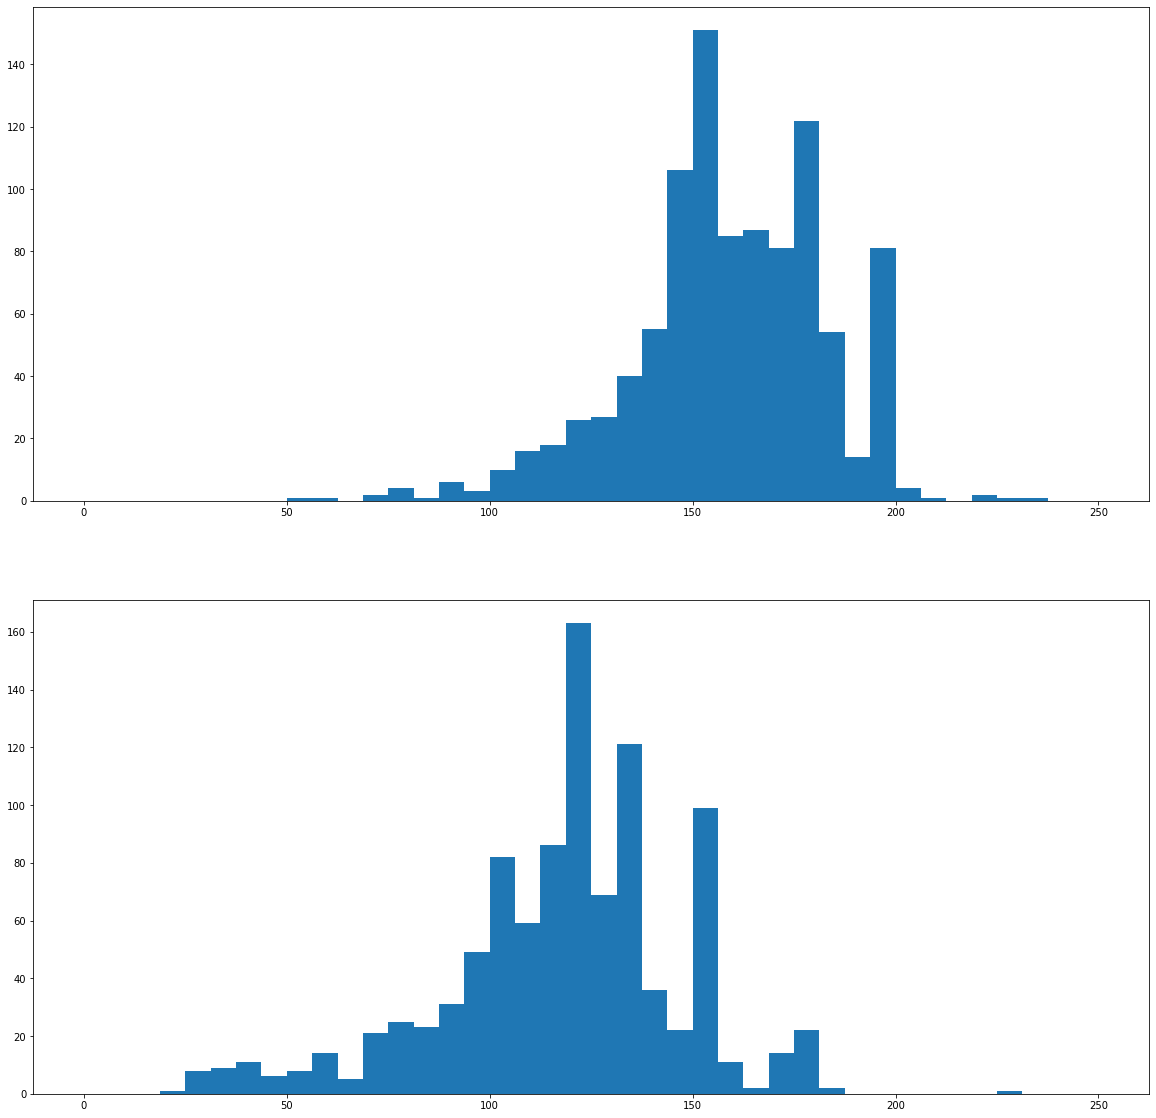

In [85]:
figs, axs = plt.subplots(2, figsize=(20, 20))
axs[0].hist(c, bins=40, range=[0, 250])
axs[1].hist(d, bins=40, range=[0, 250])



In [86]:

len(a)
for x in [a, b, c, d]:
    print(float(sum(x)) / float(len(x)))


133.989
160.235
158.999
117.548
